### 2024년 마지막주 12/30일 수업시작!


XAI(Explainable AI, 설명 가능한 AI) - 설명가능한 AI

### 활성화 함수

- sigmoid function 로지스틱 회귀 모형 0~1사이 값으로 변환
- tanh function 스케일이 y값이 -1에서 1까지
- ReLU function : 입력값이 0을 넘으면 그대로 출력 0이하는 0으로 출력

### Back propagation

- 학습하는 메커니즘을 설명하는 알고리즘
- 출력층부터 입력층까지 역의 방향으로 오차를 전파하며 가중치와 편향을 조정

### 손실함수

- mean squared error MSE
  - 평균 제곱오차 (이상치에 민감)
- Cross entropy error CEE
  - 종속 변수가 범주형일때 주로 사용
  - CEE 최소화 하는 방향으로 모형이 학습

### 기계학습

1. 지도학습 (레이블이 있는 학습)
   - 분류 Classification
   - 회귀 Regression
   - 시각 / 음성감지 / 인지
2. 비지도 학습 (레이블이 없음)
   - Clustering
   - PCA
3. 강화학습
   - Agent와 teacher를 이용해 피드백을 통해 머신 러닝 알고리즘 학습
   - 좋은 출력과 나쁜 출력이 있어서 나쁜 출력을 피하는 방법을 학습


# 데이터 준비


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
X = [-3, 31, -11, 4, 0, 22, -2, -5, -25, -14]
y = [-2, 32, -10, 5, 1, 23, -1, -4, -24, -13]

X_train = np.array(X).reshape(-1, 1)
y_train = np.array(y)

print(X_train.shape, y_train.shape)

(10, 1) (10,)


In [4]:
import matplotlib.pyplot as plt

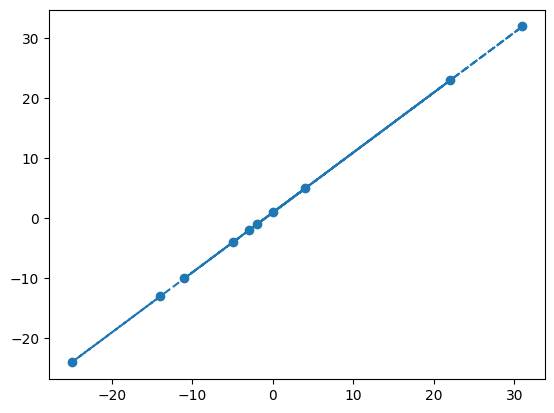

In [7]:
plt.plot(X, y, 'o--')

# 데이터 전처리


In [8]:
df = pd.DataFrame({'x': X, 'y' : y})
df.head()

,x,y
0,-3,-2
1,31,32
2,-11,-10
3,4,5
4,0,1


In [10]:
df.shape

(10, 2)

In [12]:
X_train = df.loc[:, ['x']] # 모든행, 'x' 열
y_train = df.loc[:, ['y']]
X_train.shape, y_train.shape

((10, 1), (10, 1))

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
lr.coef_ , lr.intercept_ # 기울기, 절편

(array([[1.]]), array([1.]))

In [15]:
print("기울기", lr.coef_[0][0])
print("절편", lr.intercept_[0])

기울기 0.9999999999999999
절편 0.9999999999999999


In [16]:
# 예측
X_new = np.array(11).reshape(1,1) # 자료형 맞춰주기
X_new


array([[11]])

In [17]:
lr.predict(X_new)

/Users/coldbrew/miniconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[12.]])

In [20]:
X_test = np.arange(11, 16, 1).reshape(-1, 1)
X_test

array([[11],
       [12],
       [13],
       [14],
       [15]])

In [21]:
lr.predict(X_test)

/Users/coldbrew/miniconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[12.],
       [13.],
       [14.],
       [15.],
       [16.]])

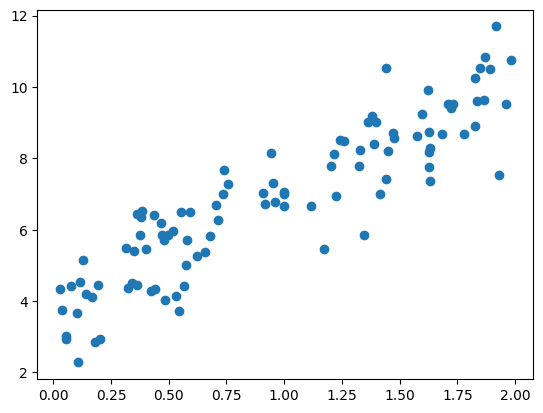

In [22]:
# 회귀 선형 모델
x = 2*np.random.rand(100,1)
y = 4 + 3*x + np.random.randn(100,1)
plt.scatter(x, y)

In [24]:
x_b = np.c_[np.ones((100,1)), x]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[3.77781918],
       [3.20103535]])

In [25]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2,1)), x_new]

prediction = x_new_b.dot(theta_best)
prediction

array([[ 3.77781918],
       [10.17988989]])

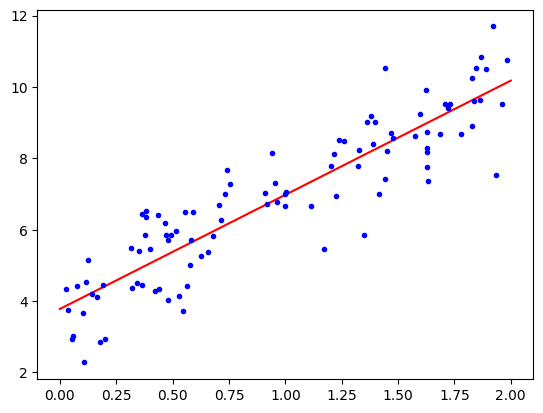

In [26]:
plt.plot(x_new, prediction, 'r-')  
plt.plot(x, y, 'b.')

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(x, y)

#학습해서 회귀선을 찾음
print(lin_reg.intercept_, lin_reg.coef_)

[3.77781918] [[3.20103535]]


In [28]:
lin_reg.predict(x_new)

array([[ 3.77781918],
       [10.17988989]])

## 경사하강법 구현


In [31]:
x = 2*np.random.rand(100, 1) # 100* 1
x_b = np.c_[np.ones((100, 1)), x] # 바이어스 1를 전체 데이터에 추가
y = 4 + 3*x + np.random.randn(100, 1) # 100*1 표준정규분포 추출

learning_rate = 0.001
iterations = 1000
m = x_b.shape[0] # 100

theta = np.random.randn(2,1) # 2*1

for iteration in range(iterations):
    gradients = 2/m*x_b.T.dot(x_b.dot(theta) -y )
    theta = theta - learning_rate * gradients

In [32]:
theta

array([[3.31720971],
       [3.64908607]])

In [35]:
## 다항회귀

from sklearn.preprocessing import PolynomialFeatures

data_num = 1000
x = 3*np.random.rand(data_num, 1) - 1 # 데이터 준비
y = 0.2*(x**2) + np.random.randn(1000,1) # y = ax^2 + b

poly_features = PolynomialFeatures(degree=2, include_bias=False) # 모델 정의
x_poly = poly_features.fit_transform(x) # x가지고 모델을 학습함
print(x[0]) # 이러한 x 일때
print(x_poly[0]) # 이러한 x_poly로 변환됨


[-0.22809917]
[-0.22809917  0.05202923]


In [36]:
lin_reg = LinearRegression() # 선형회귀 모델
lin_reg.fit(x_poly, y) # 학습

print(lin_reg.intercept_, lin_reg.coef_)

[0.03540607] [[-0.0865564   0.21955188]]


# auto MPG


In [39]:
auto_mpg = pd.read_csv('data/auto_mpg.csv')
auto_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


선형회귀로 적절한 데이터는 연속형 데이터로 mpg, displacement(배기가스), model year 등등
두개의 피처를 선택하면 weigth 대비 MPG : 무게가 늘어날수록 MPG의 관계


In [52]:
X_train = auto_mpg.loc[:, ['displacement']]
y_train = auto_mpg.loc[:, ['weight']]
X_train.shape, y_train.shape


((398, 1), (398, 1))

Text(0.5, 1.0, '무게 대비 연비')

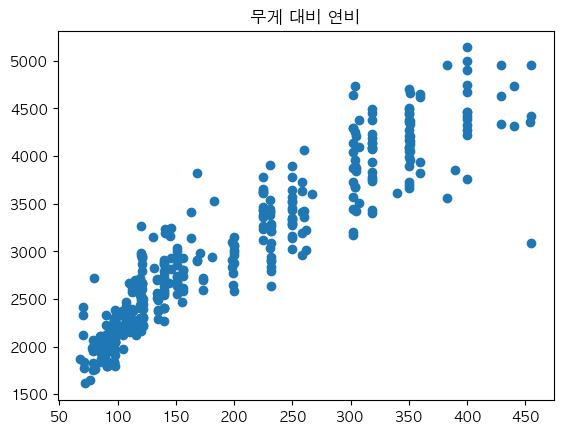

In [53]:
from matplotlib import rc
rc('font', family='AppleGothic')

plt.plot(X_train, y_train, 'o')
plt.title('무게 대비 연비')

In [54]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.coef_, lin_reg.intercept_


(array([[7.57605909]]), array([1505.01873083]))

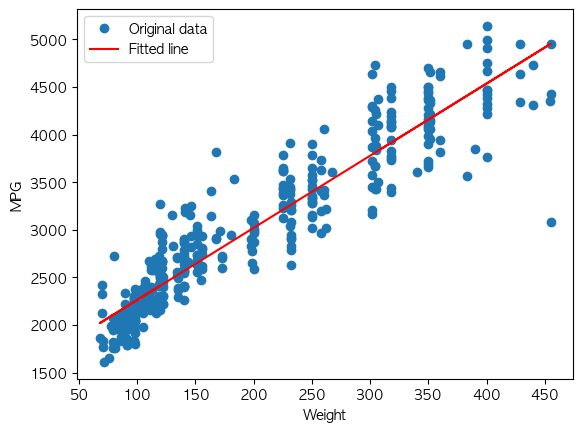

In [ ]:
# 예측된 y 값 구하기
y_pred = lin_reg.predict(X_train)

# 원래 데이터와 회귀선을 함께 플롯
plt.plot(X_train, y_train, 'o', label='Original data')
plt.plot(X_train, y_pred, 'r-', label='Fitted line')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.legend()
plt.show()

In [57]:
poly_features = PolynomialFeatures(degree=2, include_bias=False) # 모델 정의
x_poly = poly_features.fit_transform(X_train) # x가지고 모델을 학습함
print(X_train) # 이러한 x 일때
print(x_poly[0]) # 이러한 x_poly로 변환됨

     displacement
0           307.0
1           350.0
2           318.0
3           304.0
4           302.0
..            ...
393         140.0
394          97.0
395         135.0
396         120.0
397         119.0

[398 rows x 1 columns]
[  307. 94249.]


X_train shape: (398, 1), y_train shape: (398, 1)


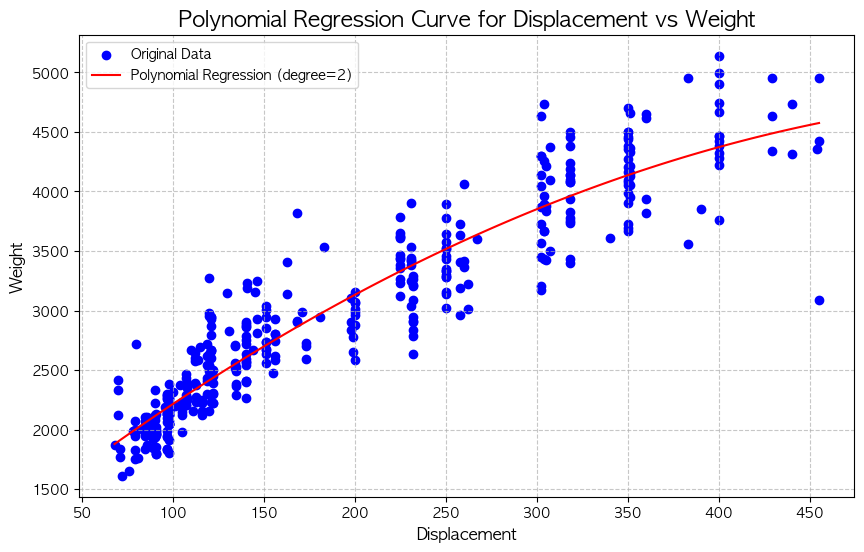

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

auto_mpg = pd.read_csv('data/auto_mpg.csv')
# 1. 데이터 준비
X_train = auto_mpg.loc[:, ['displacement']].values  # 입력 데이터
y_train = auto_mpg.loc[:, ['weight']].values  # 타겟 값
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

# 2. 다항식 변환
degree = 2  # 다항식 차수 설정
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X_train)  # 다항식 변환

# 3. 다항 회귀 모델 학습
model = LinearRegression()
model.fit(X_poly, y_train)

# 4. 예측값 계산 (곡선 그리기용)
X_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)  # X 범위 설정
X_range_poly = poly_features.transform(X_range)  # 다항식 변환
y_pred = model.predict(X_range_poly)  # 예측값 계산

# 5. 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Original Data')  # 원본 데이터
plt.plot(X_range, y_pred, color='red', label=f'Polynomial Regression (degree={degree})')  # 회귀 곡선
plt.title("Polynomial Regression Curve for Displacement vs Weight", fontsize=16)
plt.xlabel("Displacement", fontsize=12)
plt.ylabel("Weight", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [61]:
X_train.shape

(398, 1)

In [68]:
auto_mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [70]:
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


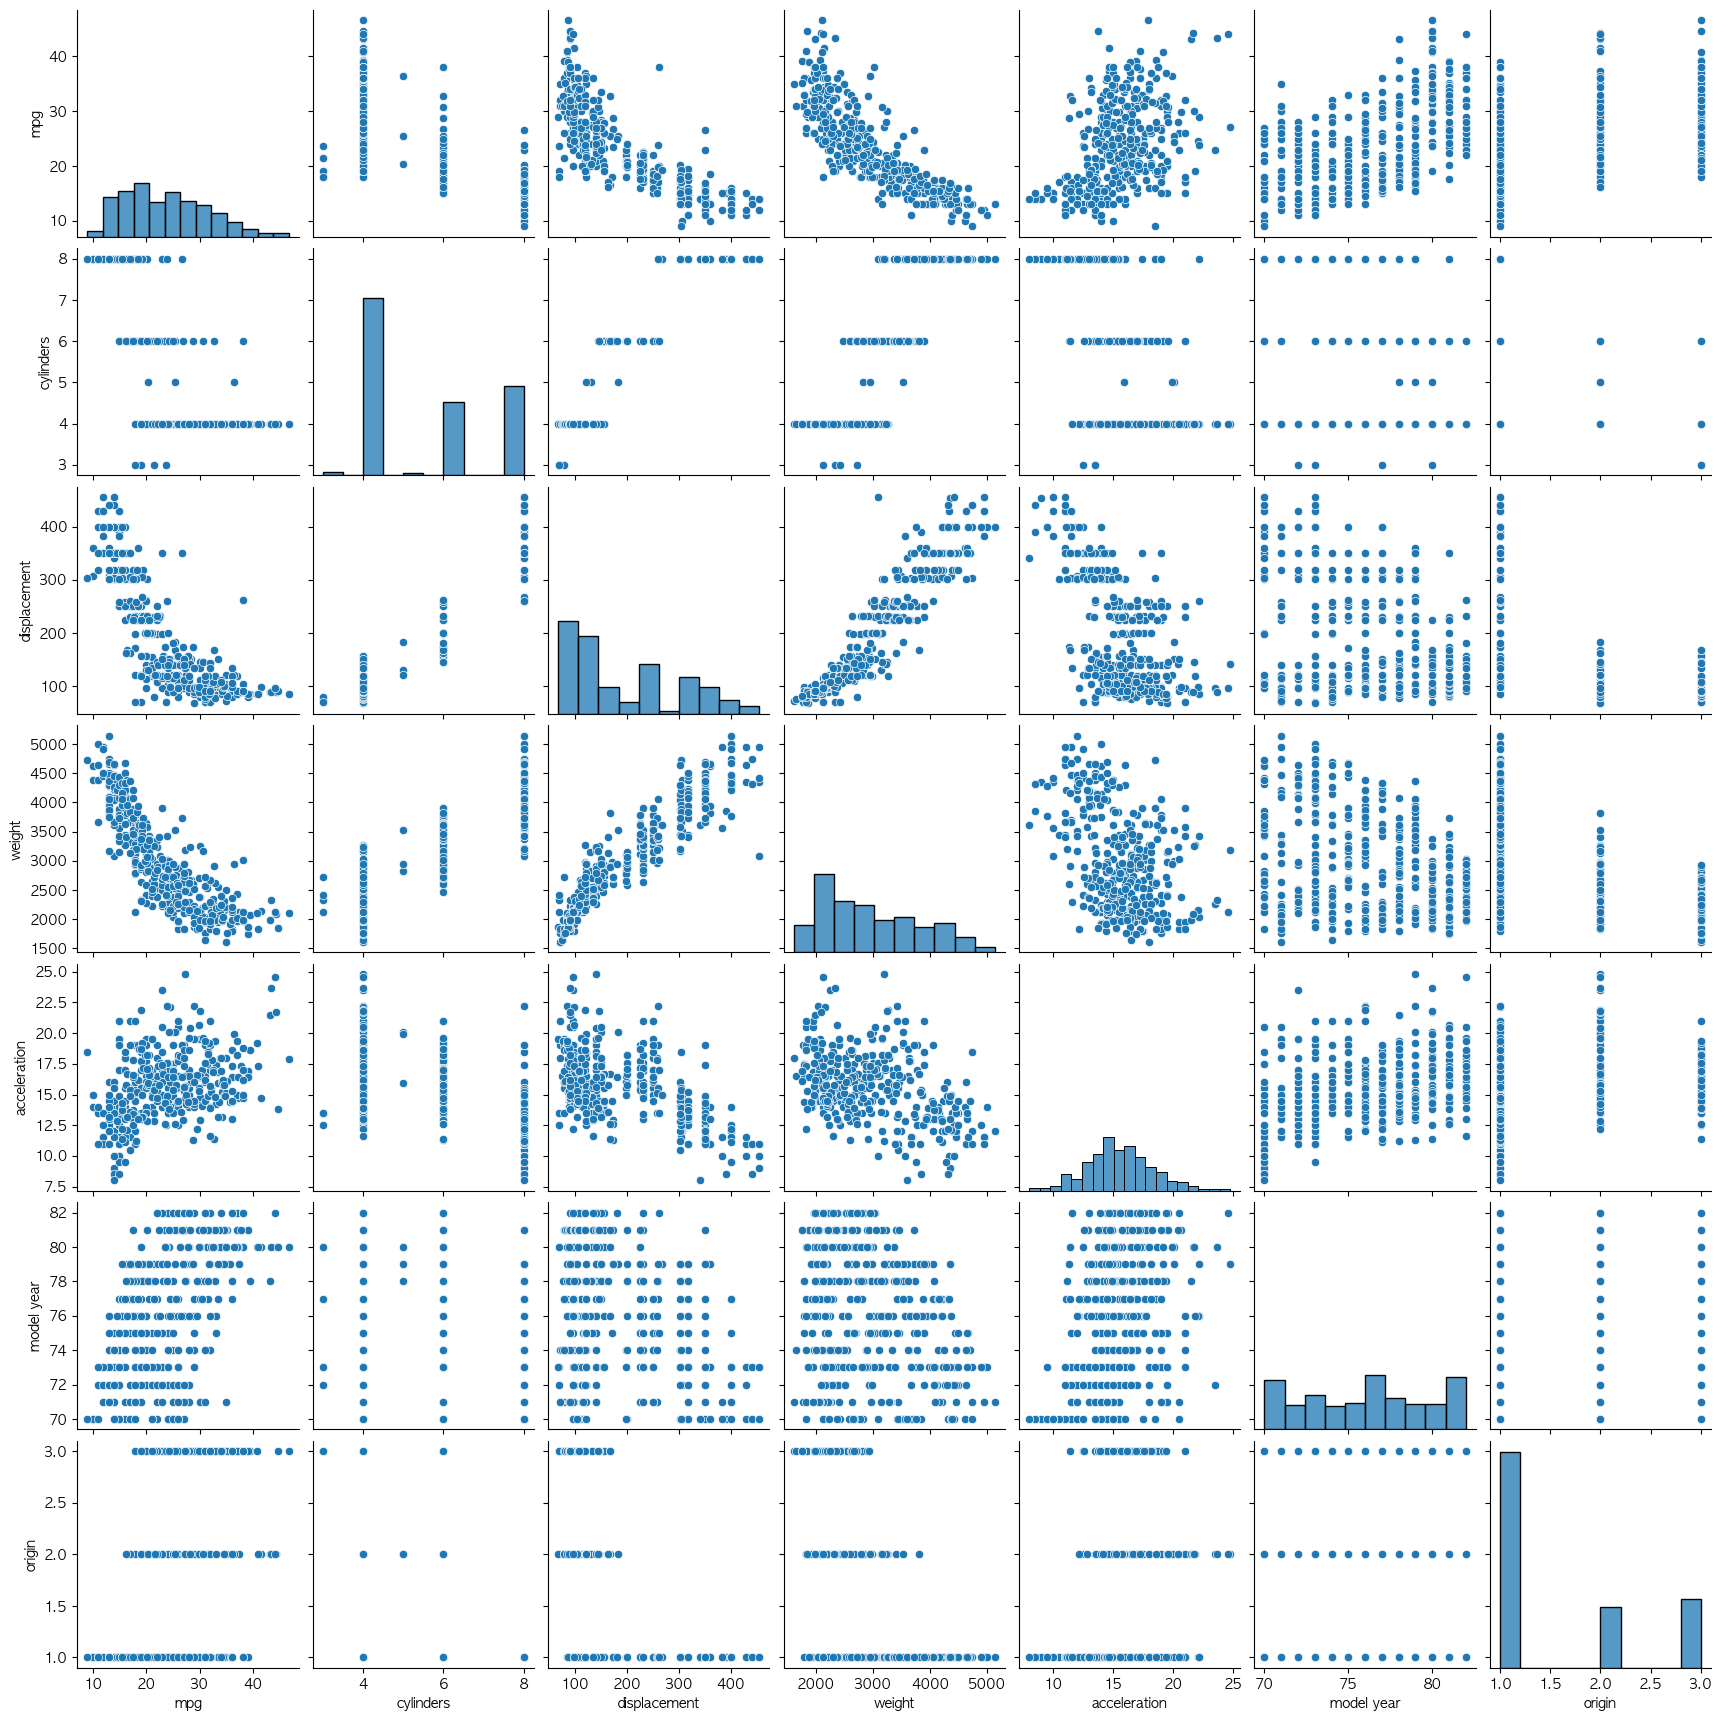

In [71]:
import seaborn as sns
sns.pairplot(auto_mpg[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin']])

## 모델 만들기


In [94]:
# 데이터 나누기
from sklearn.model_selection import train_test_split
auto_mpg = pd.read_csv('data/auto_mpg.csv')
# '?'를 NaN으로 변환
auto_mpg.replace('?', np.nan, inplace=True)
auto_mpg.dropna(inplace=True)

X_data = auto_mpg.drop(['mpg','car name'], axis=1)
y_data = auto_mpg['mpg']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(274, 7) (118, 7) (274,) (118,)


In [95]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

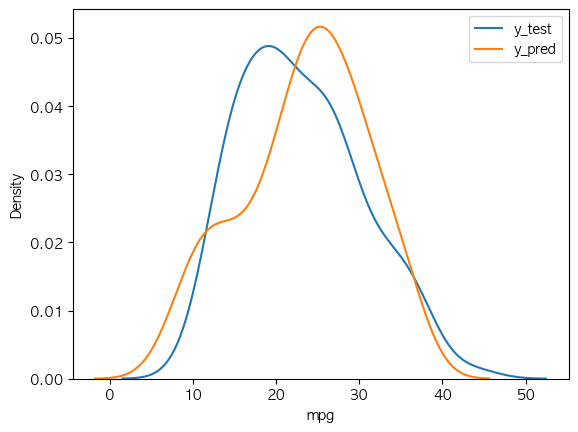

In [96]:
y_pred = lr.predict(X_test)

# y_test와 y_pred kdeplot 시각화
sns.kdeplot(y_test, label='y_test')
sns.kdeplot(y_pred, label='y_pred')
plt.legend()
plt.show()



# 피처끼리의 데이터 스케일이 다름 -> 정규화


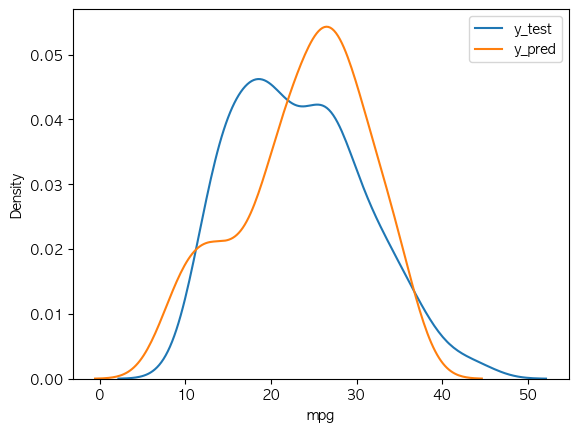

In [99]:
# 테스트 사이즈에 따라 분포가 달라짐
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.5, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# y_test와 y_pred kdeplot 시각화
sns.kdeplot(y_test, label='y_test')
sns.kdeplot(y_pred, label='y_pred')
plt.legend()
plt.show()



In [101]:
# 새로운 데이터 Lot size : 제품 크기, work hours : 작업시간
df = pd.read_csv('data/toluca_company_dataset.csv')
df.head()

,Lot_size,Work_hours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361


In [102]:
X_data = df.loc[:, ['Work_hours']]
y_data = df.loc[:, ['Lot_size']]
X_data.shape, y_data.shape

((25, 1), (25, 1))

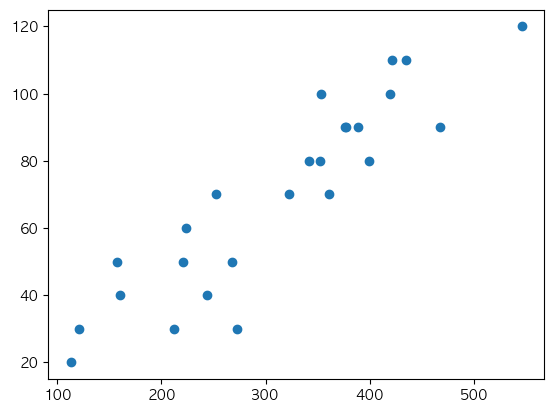

In [103]:
plt.plot(X_data, y_data, 'o')

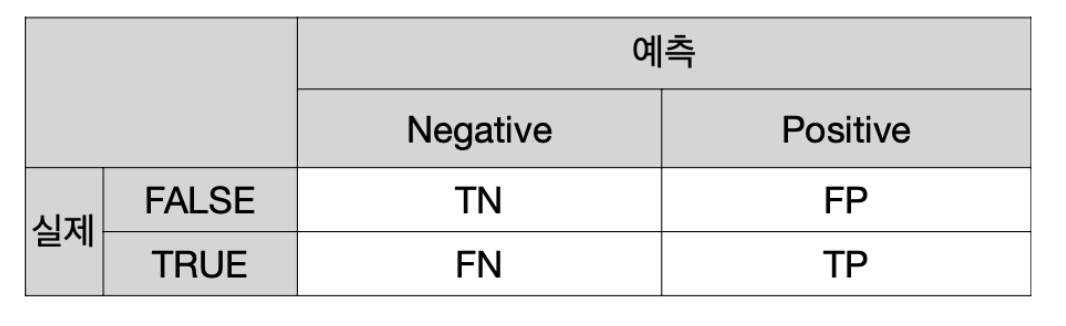

In [107]:
# 성능지표
from IPython.display import Image
Image('Screenshot 2024-12-30 at 4.30.03 PM.png')

#### Confusion matrix - 예측값

#### 정확도(accuracy)

    전체의 경우 중에 맞은 경우에 대한 확률, (TN+TP) / (전체)

#### 정밀도 (precision)

    맞다고 예측한 애들 중에 실제로 맞은것의 비율, TP / (FP+TP)

#### 재현율 (recall)

    실제로 맞은 사람들 중에 맞았다고 예측한 애들의 비율, TP / (FN+TP)

#### F1 스코어

    정밀도와 재현율은 서로 트레이드오프 관계, 둘 다 높은 점수를 맞아야 좋은 모델이라 할 수 있음
    F1 스코어는 정밀도와 재현율의 조화 평균, 2 / [(1/recall) + (1/precision)]

#### ROC, AUC

    맞출 때마다 TPR(수직) 방향으로 한 칸씩 올라갑니다. 그리고 틀리면 FPR(수평) 방향으로 이동


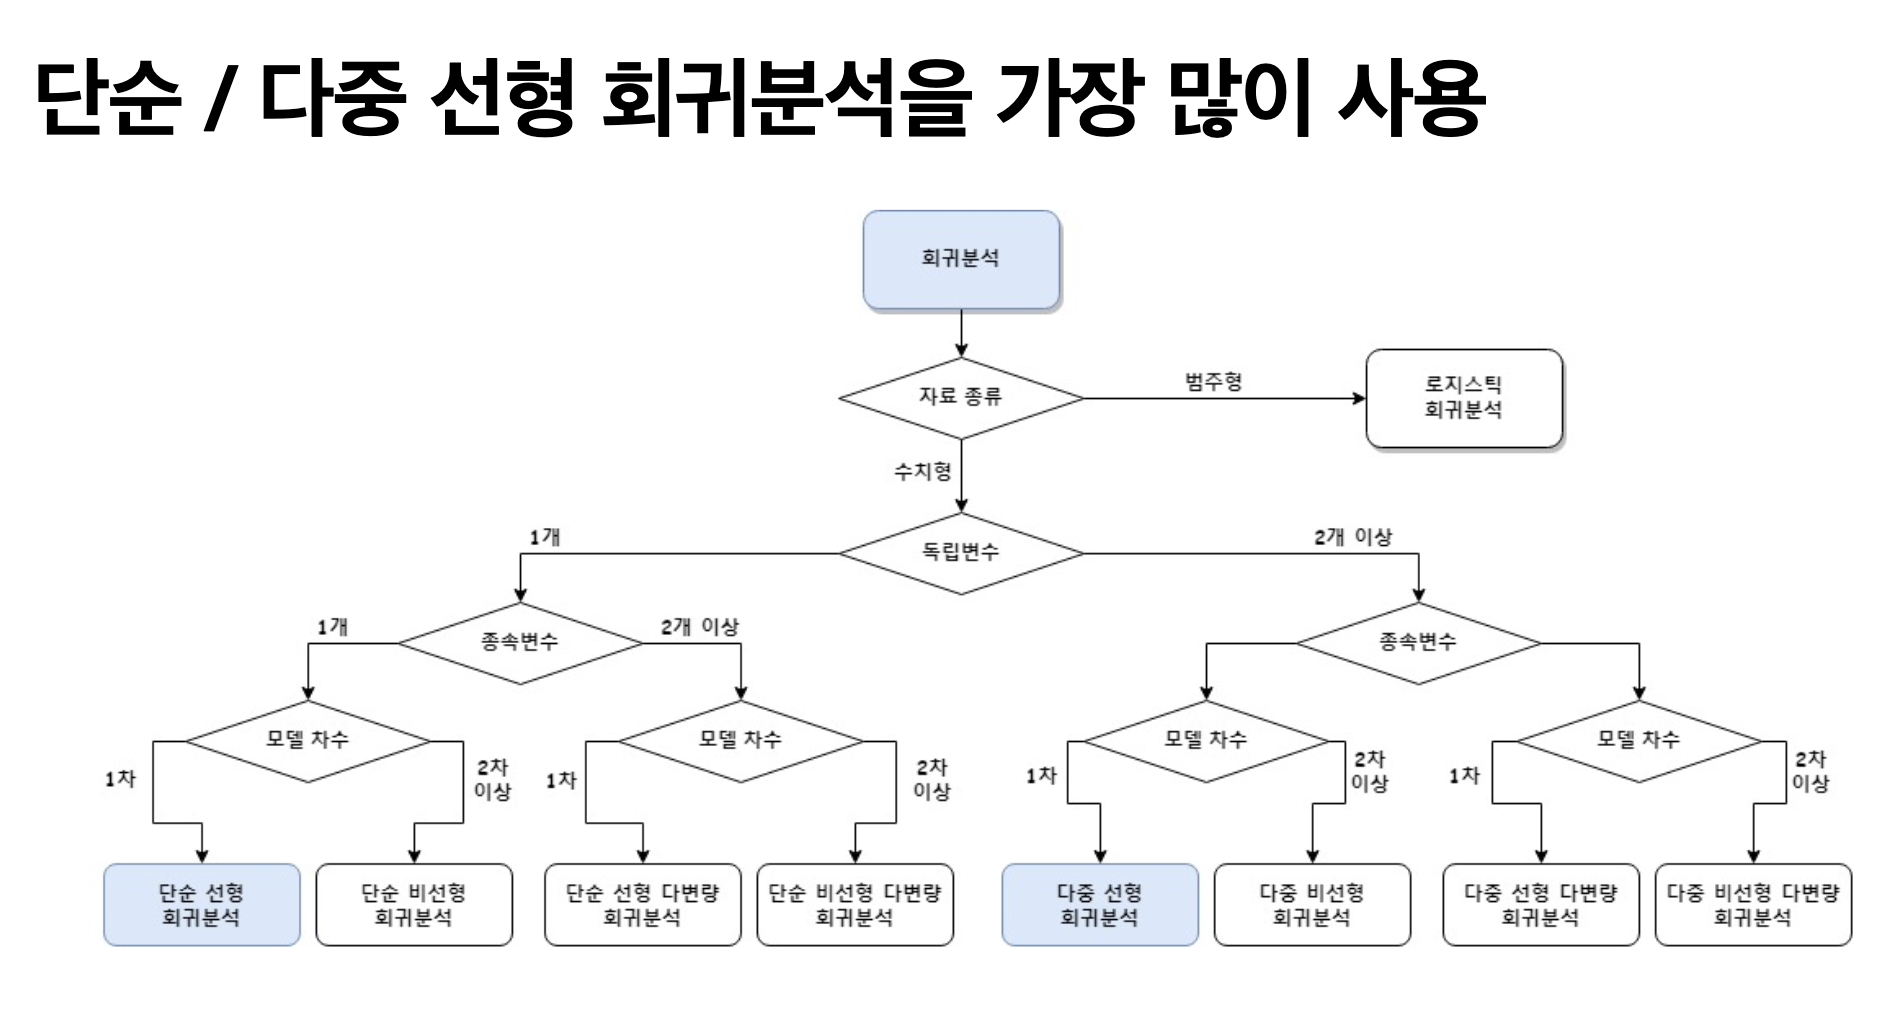

In [109]:
Image('Screenshot 2024-12-30 at 4.50.44 PM.png')

# 분류모델

## 이중 분류

## 다중 분류


주요 모듈

예제데이터 예제 데이터 : sklearn.datasets

데이터 분리, 검증 & 파라미터 튜닝 : sklearn.model_selection

- 교차검증을 위한 학습용/테스트용 데이터 분리, 그리드서치로 최적 파라미터 추출 등 API 제공

피처 처리

- sklearn.preprocessing : 데이터 전처리용 기능 제공
- sklearn.feature_selection : 알고리즘에 큰 영향을 미치는 피처를 우선순위대로 셀렉션 작업해주는 기능 제공
- sklearn.feature_extraction : 텍스트나 이미지 데이터의 벡터화된 피처 추출에 사용

피처 처리 & 차원 축소 : sklearn.decompostion
평가 : sklearn.metrics


1. sklearn.ensemble  
   • 앙상블 학습(Ensemble Learning) 알고리즘을 제공합니다. 여러 모델의 결과를 결합하여 예측 성능을 향상시킵니다.

주요 알고리즘: 1. Random Forest:  
 • 다수의 결정 트리(Decision Tree)를 사용한 앙상블 모델. 2. Gradient Boosting:  
 • 이전 모델의 오류를 보완하면서 점진적으로 학습하는 모델. 3. VotingClassifier:  
 • 여러 분류기의 결과를 투표 방식으로 결합.

3. sklearn.linear_model  
   • 선형 모델 기반 알고리즘을 제공합니다.

주요 알고리즘: 1. Linear Regression:  
 • 데이터의 선형 관계를 학습합니다. 2. Logistic Regression:  
 • 이진 또는 다중 클래스 분류 문제를 해결합니다. 3. Ridge/Lasso Regression:  
 • 과적합을 방지하기 위해 정규화(regularization)를 추가한 선형 회귀.

4. sklearn.naive_bayes  
   • 나이브 베이즈(Naive Bayes) 알고리즘을 제공합니다. 조건부 확률 기반의 간단하고 빠른 분류기입니다.

주요 알고리즘:

1. Gaussian Naive Bayes:  
   • 입력 데이터가 정규분포를 따른다고 가정. 2. Multinomial Naive Bayes:  
   • 텍스트 데이터와 같은 이산 데이터에 적합. 3. Bernoulli Naive Bayes:  
   • 이진 데이터에 적합.

2. sklearn.neighbors  
   • K-Nearest Neighbors (KNN) 기반 알고리즘을 제공합니다. 거리 측정을 기반으로 최근접 데이터를 통해 예측합니다.

주요 알고리즘:

1. KNeighborsClassifier:
   • 분류 문제를 해결. 2. KNeighborsRegressor:
   • 회귀 문제를 해결. 3. RadiusNeighborsClassifier:
   • 특정 반경 내의 데이터를 기준으로 예측.

2. sklearn.svm  
   • 서포트 벡터 머신(Support Vector Machine) 알고리즘을 제공합니다. 분류, 회귀, 이상치 탐지에 사용됩니다.

주요 알고리즘:

1. SVC (Support Vector Classification):
   • 데이터를 초평면으로 나누는 분류 알고리즘. 2. SVR (Support Vector Regression):
   • 서포트 벡터를 사용한 회귀 알고리즘. 3. LinearSVC/LinearSVR:
   • 선형적으로 분리 가능한 데이터에 적합.

2. sklearn.tree  
   • 의사결정 나무(Decision Tree) 기반 알고리즘을 제공합니다. 데이터를 조건에 따라 분할하여 예측합니다.

주요 알고리즘:

1. DecisionTreeClassifier:
   • 분류 문제를 해결. 2. DecisionTreeRegressor:
   • 회귀 문제를 해결.

2. sklearn.cluster  
   • 비지도 학습(unsupervised learning)에서 데이터를 클러스터로 그룹화합니다.

주요 알고리즘: 1. KMeans:
• 데이터를 사전에 정의된 K개의 클러스터로 나눔. 2. DBSCAN:
• 밀도 기반 클러스터링. 3. AgglomerativeClustering:
• 계층적 클러스터링 방법.

요약
• sklearn.ensemble: 앙상블 기법(랜덤 포레스트, 부스팅 등).
• sklearn.linear_model: 선형 회귀와 로지스틱 회귀.
• sklearn.naive_bayes: 확률 기반 분류.
• sklearn.neighbors: KNN 기반 알고리즘.
• sklearn.svm: SVM 기반 분류와 회귀.
• sklearn.tree: 의사결정 나무.
• sklearn.cluster: 클러스터링 알고리즘.


## 당뇨병 데이터


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

diabetes = pd.read_csv('data/diabetes.csv')
print(diabetes['Outcome'].value_counts())
diabetes.head()

In [110]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
	layers.Dense(64, activation='relu', input_shape=(7,)),
	layers.Dense(64, activation='relu'),
	layers.Dense(1)
])
model.summary()


/Users/coldbrew/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(diabetes.iloc[:, :-1], diabetes['Outcome'], epochs=100)